<a href="https://colab.research.google.com/github/kamnasha18-a11y/my-weather-app/blob/main/Welcome_to_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
!pip install plotly seaborn --quiet


In [33]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Create sample data
n_rows = 500
df = pd.DataFrame({
    'timestamp': pd.date_range(start='2025-01-01', periods=n_rows, freq='H'),
    'area': np.random.choice(['Downtown', 'Uptown', 'Suburb', 'Industrial'], n_rows),
    'traffic_count': np.random.randint(50, 500, n_rows),
    'pollution': np.random.randint(20, 200, n_rows),
    'weather': np.random.choice(['Sunny', 'Rainy', 'Cloudy'], n_rows),
    'transport_mode': np.random.choice(['Car', 'Bus', 'Bike', 'Walk'], n_rows)
})

# Add hour and day features
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day_name()

df.head()


/tmp/ipython-input-2367739189.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'timestamp': pd.date_range(start='2025-01-01', periods=n_rows, freq='H'),


,timestamp,area,traffic_count,pollution,weather,transport_mode,hour,day
0,2025-01-01 00:00:00,Suburb,240,184,Rainy,Walk,0,Wednesday
1,2025-01-01 01:00:00,Industrial,302,102,Sunny,Bike,1,Wednesday
2,2025-01-01 02:00:00,Downtown,465,164,Cloudy,Car,2,Wednesday
3,2025-01-01 03:00:00,Suburb,210,104,Cloudy,Walk,3,Wednesday
4,2025-01-01 04:00:00,Suburb,305,97,Rainy,Walk,4,Wednesday


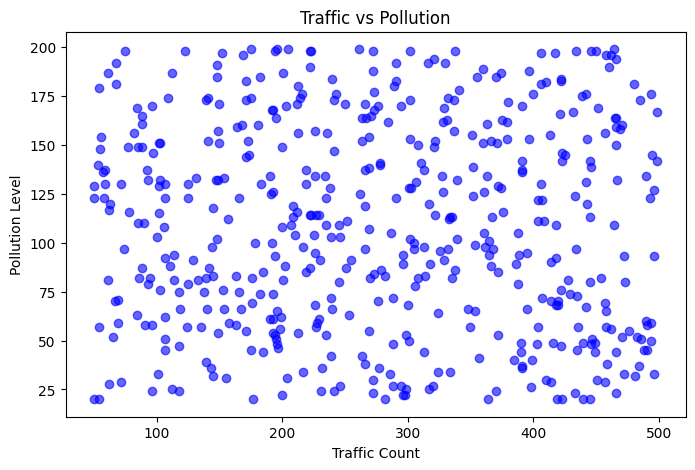

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df['traffic_count'], df['pollution'], alpha=0.6, color='blue')
plt.xlabel("Traffic Count")
plt.ylabel("Pollution Level")
plt.title("Traffic vs Pollution")
plt.show()


In [35]:
import plotly.express as px

# Traffic by weather
traffic_weather = df.groupby('weather')['traffic_count'].mean().reset_index()
fig1 = px.bar(traffic_weather, x='weather', y='traffic_count', color='traffic_count',
              title="Average Traffic by Weather")
fig1.show()

# Pollution by weather
pollution_weather = df.groupby('weather')['pollution'].mean().reset_index()
fig2 = px.bar(pollution_weather, x='weather', y='pollution', color='pollution',
              title="Average Pollution by Weather")
fig2.show()


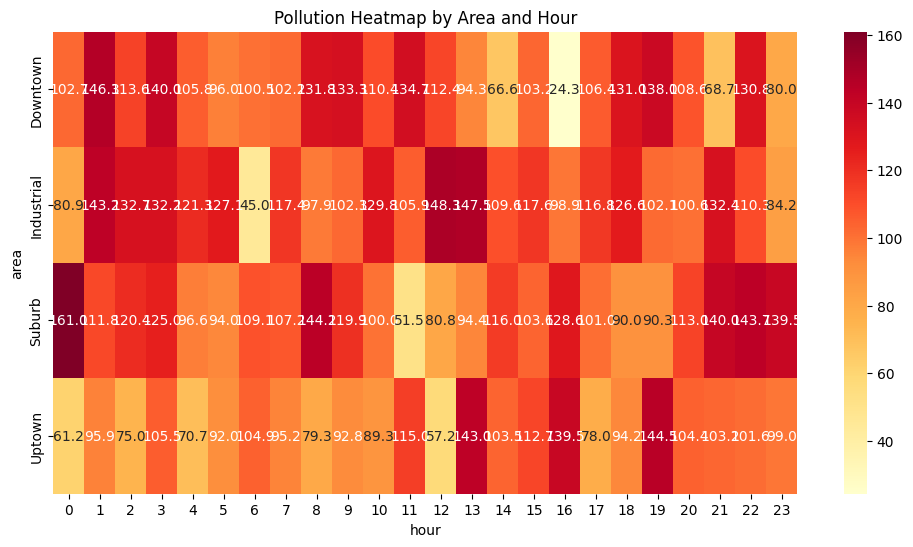

In [36]:
import seaborn as sns

pivot = df.pivot_table(values='pollution', index='area', columns='hour', aggfunc='mean')
plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap='YlOrRd', annot=True, fmt=".1f")
plt.title("Pollution Heatmap by Area and Hour")
plt.show()


In [37]:
# Example filtering
selected_area = 'Downtown'  # You can change this
hour_min, hour_max = 8, 18

filtered_df = df[(df['area']==selected_area) & (df['hour']>=hour_min) & (df['hour']<=hour_max)]
filtered_df.head()


,timestamp,area,traffic_count,pollution,weather,transport_mode,hour,day
15,2025-01-01 15:00:00,Downtown,329,91,Rainy,Bike,15,Wednesday
35,2025-01-02 11:00:00,Downtown,75,198,Cloudy,Car,11,Thursday
37,2025-01-02 13:00:00,Downtown,355,185,Cloudy,Bike,13,Thursday
38,2025-01-02 14:00:00,Downtown,458,57,Sunny,Walk,14,Thursday
57,2025-01-03 09:00:00,Downtown,264,164,Sunny,Car,9,Friday
